In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

In [16]:
data = pd.read_excel('大学生恋爱观调查问卷.xlsx', index_col='序号')
data.head()

,所用时间,来自IP,1、请问你是男生还是女生,2、你认为从认识到表白，时间间隔一般是多久？,3、你选择谈恋爱对象时会考虑什么（正式恋爱之前）,4、如果异性约你单独出去，你认为你们之间一般认识多久，你才会答应他（她）？（或者你认为认识多久，你才会单独约感兴趣的异性出去？）,5、如果一位异性朋友对你有明显的往恋爱方向发展的倾向，你目前对他（她）并没有感觉（你对其他人也没有感觉），你是否会持续接受对方类似于单独出去吃饭，看电影，散步之类的邀请？,6、你会思考和另一半的未来么？,7、你倾向于在恋爱前充分了解对方，还是在恋爱中慢慢了解对方，如果不合适再分手？,8、如果你认为一段感情不能走到最后，你的决定是？
序号,,,,,,,,,,
1,30秒,106.18.137.166(湖南-长沙),男生,半个月到一个月,长相┋对你的态度┋性格┋价值观,一个月内,不会,会,恋爱前充分考虑,(跳过)
2,37秒,223.150.75.70(湖南-常德),男生,半年以上,补充选项：〖为什么要谈恋爱?〗,一个月内,会,会,恋爱前充分考虑,(跳过)
3,175秒,222.139.249.81(河南-南阳),女生,半年以上,长相┋对你的态度┋财富┋性格┋价值观┋补充选项：〖三观相合，理解对方，能懂对方想要什么〗,一个月往上,不会,会,恋爱前充分考虑,(跳过)
4,39秒,43.250.200.87(湖南-长沙),男生,半年以上,对你的态度┋性格,一周之内,会,会,恋爱前充分考虑,(跳过)
5,42秒,103.63.154.71(辽宁-营口),女生,一个月到三个月,长相┋对你的态度┋财富┋性格┋价值观,一个月往上,不会,会,恋爱前充分考虑,(跳过)


# 数据集处理

In [17]:
time = data['所用时间'].copy()
for i in range(len(data)):
    time[i+1] = int(time[i+1][0:time[i+1].rfind('秒')])

data['所用时间'] = time

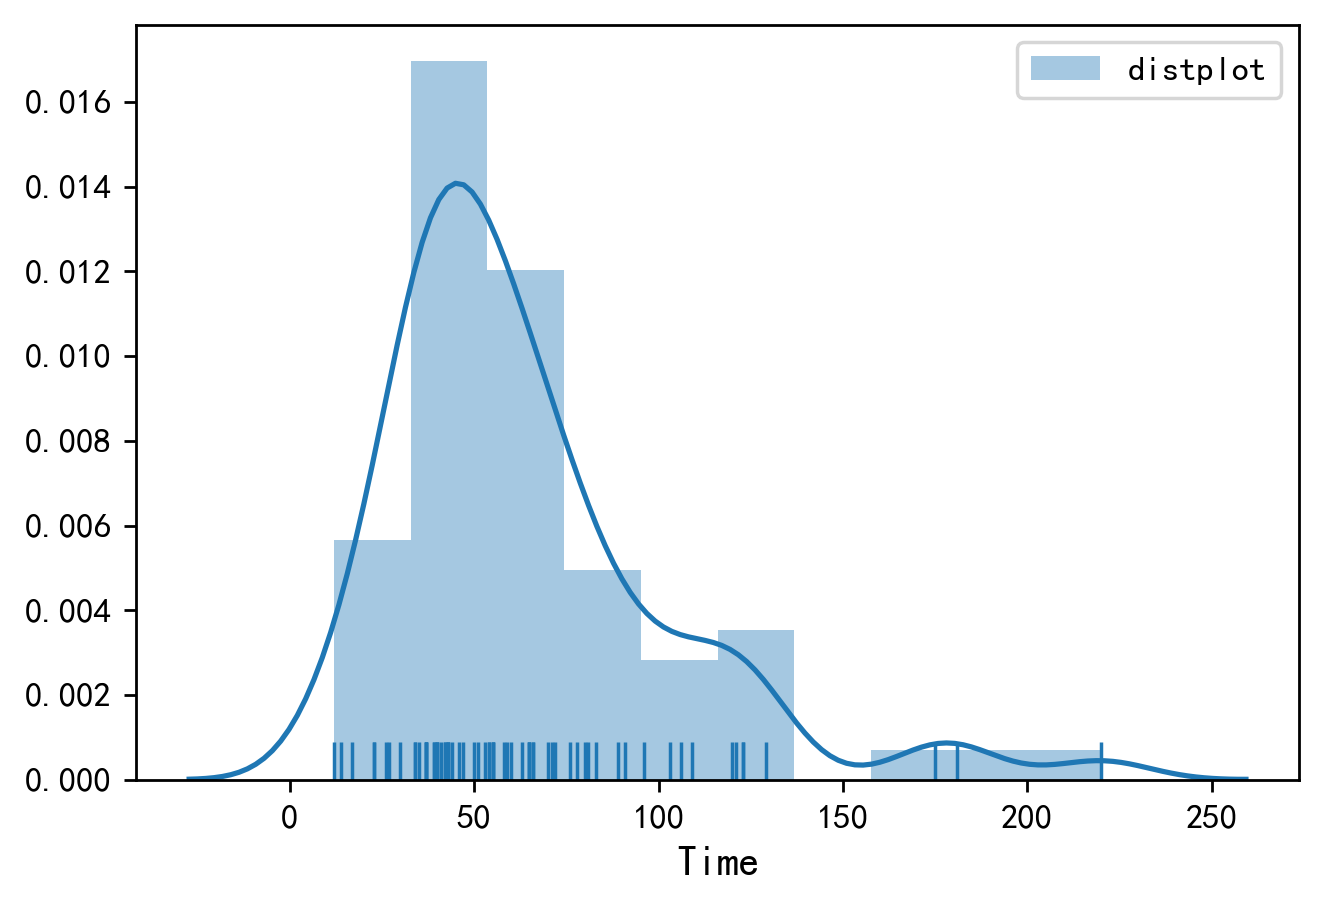

In [4]:
# 问卷时间分布
plt.figure(dpi=250)
sns.distplot(time.values,bins=10,hist = True, kde = True, norm_hist = False,
            rug = True, vertical = False,
             label = 'distplot')
plt.xlabel('Time',fontsize=12)
#plt.title('问卷填制时间分布图')
plt.legend()
plt.show()

In [5]:
male_ratio=sum(data['1、请问你是男生还是女生']=='男生')/len(data)
print('男生比例：',male_ratio)
female_ratio = sum(data['1、请问你是男生还是女生']=='女生')/len(data)
print('女生比例：',female_ratio)

男生比例： 0.3382352941176471
女生比例： 0.6617647058823529


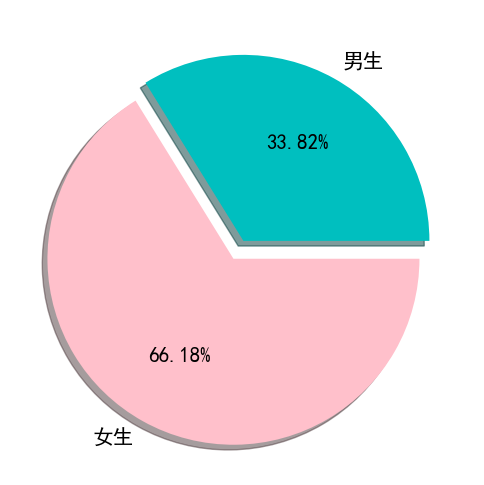

In [6]:
plt.figure(figsize=(6,8),dpi=100)
plt.pie(x=[male_ratio,female_ratio],autopct="%0.2f%%",labels=['男生','女生'],shadow=True,explode=[0.01,0.1],
       textprops={'fontsize': 15, 'color': 'black'},colors=('c','pink'))
#plt.legend(loc='best',fontsize=15)
#plt.title('问卷填制男女比例图',fontsize=20)
plt.show()

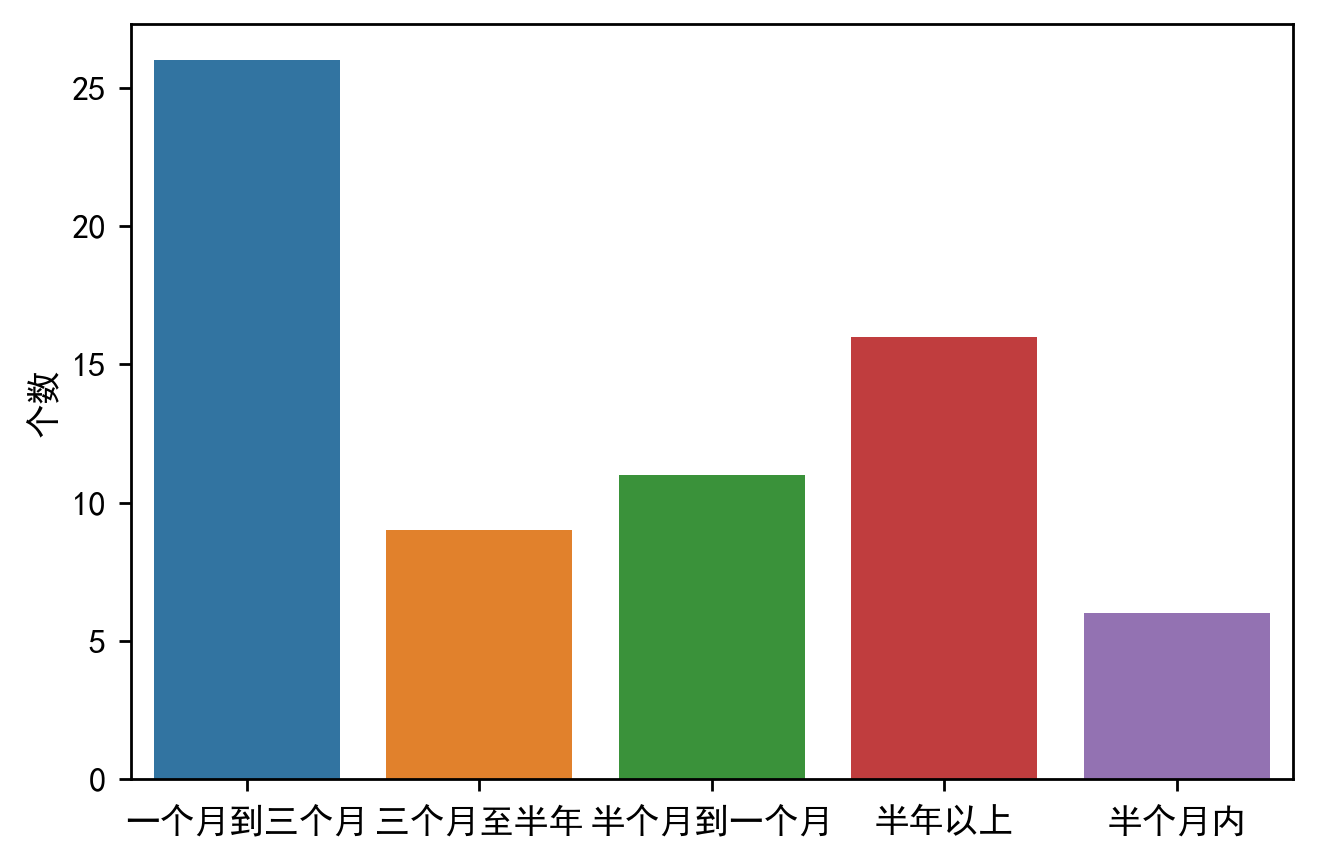

In [7]:
# 问题二可视化

two = data['2、你认为从认识到表白，时间间隔一般是多久？'].value_counts(sort=False)
plt.figure(dpi=250)
sns.barplot(y=two,x=two.index)
plt.ylabel('个数')
#plt.title('问题二选项柱形图')
plt.show()

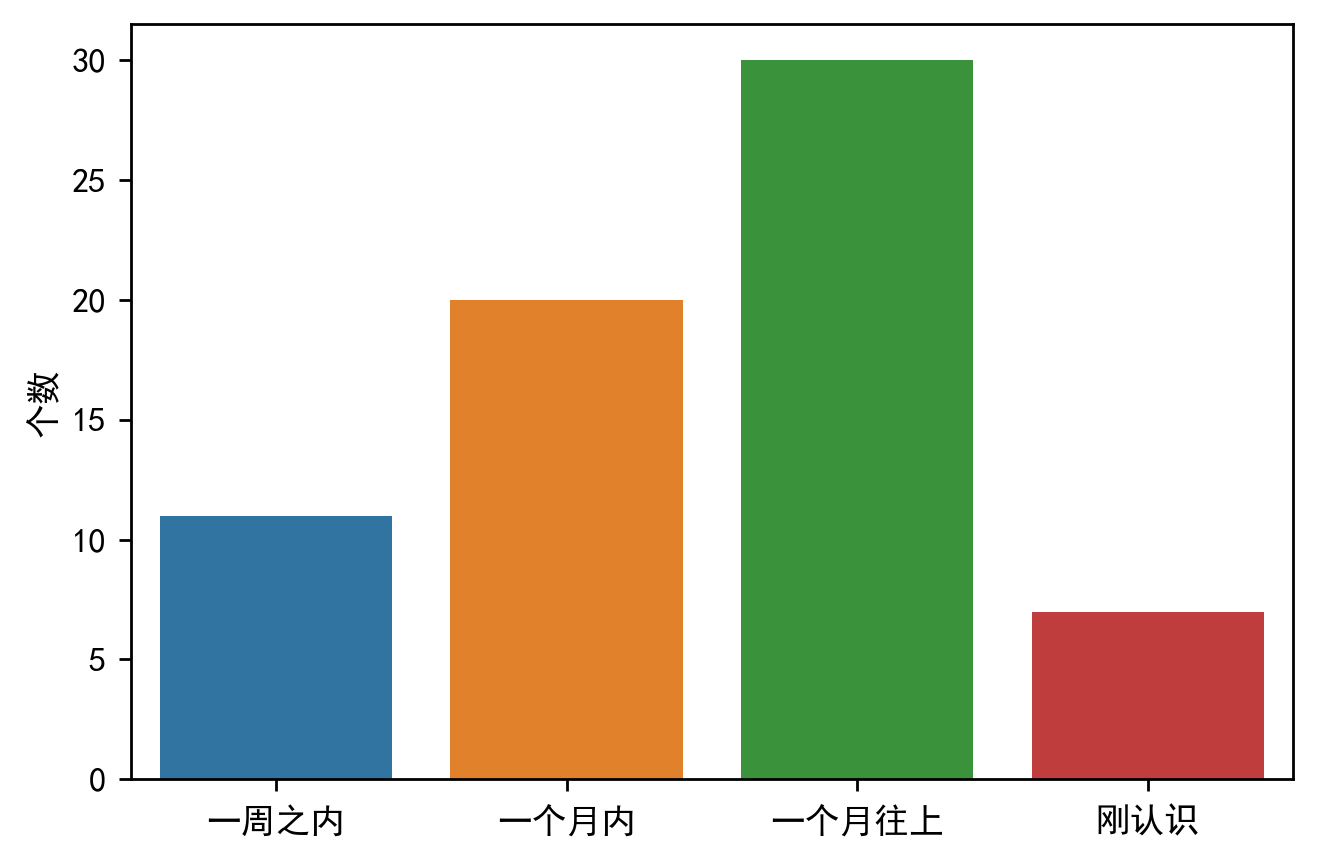

In [8]:
# 问题4可视化
four = data['4、如果异性约你单独出去，你认为你们之间一般认识多久，你才会答应他（她）？（或者你认为认识多久，你才会单独约感兴趣的异性出去？）'].value_counts(sort=False)
plt.figure(dpi=250)
sns.barplot(y=four.values,x=four.index)
plt.ylabel('个数')
#plt.title('问题四选项柱形图')
plt.show()

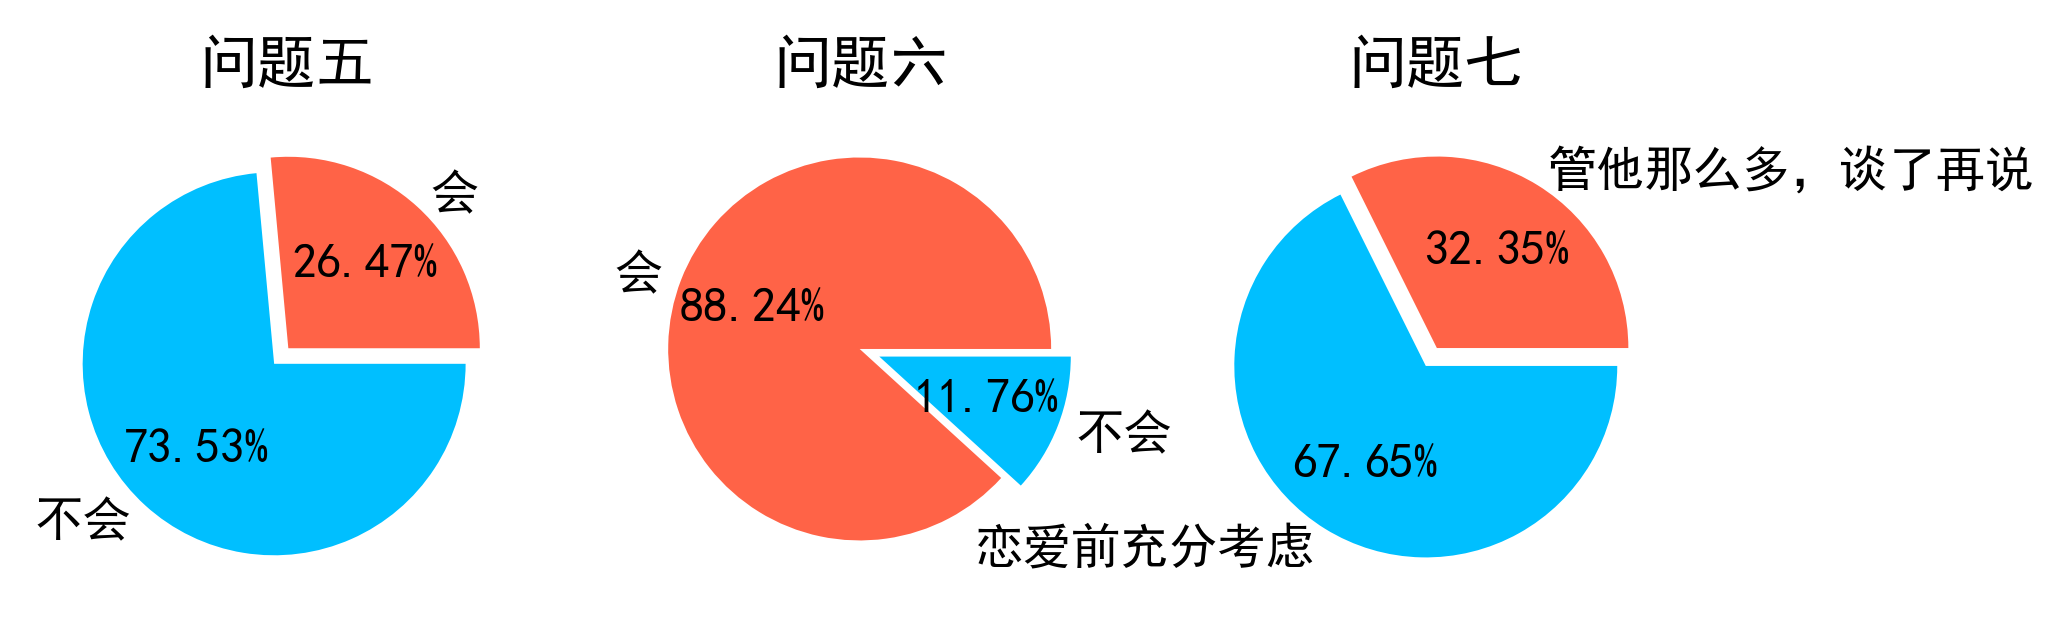

In [9]:
# 问题5、6、7可视化
five = data['5、如果一位异性朋友对你有明显的往恋爱方向发展的倾向，你目前对他（她）并没有感觉（你对其他人也没有感觉），你是否会持续接受对方类似于单独出去吃饭，看电影，散步之类的邀请？'].value_counts(sort=False)
f_no = five['不会']/len(five)
f_yes = five['会']/len(five)

six = data['6、你会思考和另一半的未来么？'].value_counts(sort=False)
s_yes = six['会']/len(six)
s_no = six['不会']/len(six)

seven = data['7、你倾向于在恋爱前充分了解对方，还是在恋爱中慢慢了解对方，如果不合适再分手？'].value_counts(sort=False)
se_be = seven['管他那么多，谈了再说']/len(seven)
se_af = seven['恋爱前充分考虑']/len(seven)


plt.figure(dpi=350)
plt.subplot2grid((1,3),(0,0),colspan=1,rowspan=1)
plt.pie(x=[f_yes,f_no],autopct="%0.2f%%",labels=['会','不会'],explode=[0.01,0.1],
       textprops={'fontsize': 10, 'color': 'black'},colors=('tomato','deepskyblue'))
plt.title('问题五',fontsize=12)

plt.subplot2grid((1,3),(0,1),colspan=1,rowspan=1)
plt.pie(x=[s_yes,s_no],autopct="%0.2f%%",labels=['会','不会'],explode=[0.01,0.1],
       textprops={'fontsize': 10, 'color': 'black'},colors=('tomato','deepskyblue'))
plt.title('问题六',fontsize=12)

plt.subplot2grid((1,3),(0,2),colspan=1,rowspan=1)
plt.pie(x=[se_be,se_af],autopct="%0.2f%%",labels=['管他那么多，谈了再说','恋爱前充分考虑'],explode=[0.01,0.1],
       textprops={'fontsize': 10, 'color': 'black'},colors=('tomato','deepskyblue'))
plt.title('问题七',fontsize=12)
plt.show()

# 关联规则分析

In [21]:
data.drop('3、你选择谈恋爱对象时会考虑什么（正式恋爱之前）',axis=1,inplace=True)
data.drop('来自IP',axis=1,inplace=True)
data.drop('所用时间',axis=1,inplace=True)

In [34]:
a = data.iloc[:,3].copy()
b = data.iloc[:,4].copy()

for i in range(len(data)):
    a[i+1]='5、'+a[i+1]

for i in range(len(data)):
    b[i+1]='6、'+b[i+1]

In [35]:
data.iloc[:,3]=a
data.iloc[:,4]=b

In [47]:
from efficient_apriori import apriori
d = data.values

# 挖掘频繁项集和频繁规则
itemsets, rules = apriori(d.tolist(), min_support=0.5,  min_confidence=0.8)
print(itemsets)
print()
print(rules)

{1: {('6、会',): 60, ('5、不会',): 50, ('恋爱前充分考虑',): 46, ('女生',): 45}, 2: {('5、不会', '6、会'): 45, ('5、不会', '恋爱前充分考虑'): 35, ('6、会', '恋爱前充分考虑'): 41, ('5、不会', '女生'): 38, ('6、会', '女生'): 39, ('女生', '恋爱前充分考虑'): 34}}

[{5、不会} -> {6、会}, {恋爱前充分考虑} -> {6、会}, {女生} -> {5、不会}, {女生} -> {6、会}]


## 后39位 

In [66]:
new_d = data[29:].values

itemsets, rules = apriori(new_d.tolist(), min_support=0.5,  min_confidence=0.9)
#print(itemsets)
# print()
print(rules)

[{5、不会} -> {6、会}, {女生} -> {6、会}, {恋爱前充分考虑} -> {6、会}, {5、不会, 女生} -> {6、会}, {5、不会, 恋爱前充分考虑} -> {6、会}]


In [96]:
# all_boy = data[data['1、请问你是男生还是女生']=='男生'].values.tolist()              # 所有男生
# itemsets, rules = apriori(all_boy, min_support=0.6,  min_confidence=0.9) 
# print(rules)

of_boy = data[data['1、请问你是男生还是女生']=='男生'].loc[29:,:].values.tolist()    # 后39位男生
itemsets, rules = apriori(of_boy, min_support=0.5,  min_confidence=0.9)
print()
print(rules)


[{5、不会} -> {6、会}, {5、不会} -> {男生}, {6、会} -> {男生}, {先谈着} -> {男生}, {管他那么多，谈了再说} -> {男生}, {恋爱前充分考虑} -> {6、会}, {恋爱前充分考虑} -> {男生}, {5、不会, 男生} -> {6、会}, {5、不会, 6、会} -> {男生}, {5、不会} -> {6、会, 男生}, {6、会, 先谈着} -> {男生}, {恋爱前充分考虑, 男生} -> {6、会}, {6、会, 恋爱前充分考虑} -> {男生}, {恋爱前充分考虑} -> {6、会, 男生}]


In [100]:
of_girl = data[data['1、请问你是男生还是女生']=='女生'].loc[30:,:].values.tolist()      # 后39位女生
itemsets, rules = apriori(of_girl, min_support=0.5,  min_confidence=0.9)
print()
print(rules)


[{5、不会} -> {6、会}, {5、不会} -> {女生}, {恋爱前充分考虑} -> {5、不会}, {女生} -> {6、会}, {6、会} -> {女生}, {恋爱前充分考虑} -> {6、会}, {恋爱前充分考虑} -> {女生}, {不会开始这段感情} -> {女生}, {5、不会, 女生} -> {6、会}, {5、不会, 6、会} -> {女生}, {5、不会} -> {6、会, 女生}, {女生, 恋爱前充分考虑} -> {5、不会}, {5、不会, 恋爱前充分考虑} -> {女生}, {恋爱前充分考虑} -> {5、不会, 女生}, {女生, 恋爱前充分考虑} -> {6、会}, {6、会, 恋爱前充分考虑} -> {女生}, {恋爱前充分考虑} -> {6、会, 女生}, {5、不会, 不会开始这段感情} -> {女生}, {6、会, 不会开始这段感情} -> {女生}, {不会开始这段感情, 恋爱前充分考虑} -> {女生}, {5、不会, 6、会, 恋爱前充分考虑} -> {女生}]
